# **In this project, the dataset contains information about House Prices Prediction . This data can be used for a lot of purposes such as price prediction to exemplify the use of regression techniques in Machine Learning.**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
dataset = pd.read_csv(path)

In [3]:
# First viewing column and the data inside them and how they are arranged
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**We will drop the Id column as it is not necessary for model training.**

In [4]:
dataset = dataset.drop('Id', axis=1)
dataset.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


**Dataset Rows & Columns count**

In [5]:
# Dataset Rows & Columns count
# we also want the size of our data (i.e, Dataset size) 
dataset.shape

(1460, 80)

**Dataset Information**

In [6]:
# Dataset Info
# checking for columns information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# Dataset Describe
# computing and displaying summary statistics for dataset
dataset.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


**Duplicate Value**

In [8]:
# Dataset Duplicate Value Count
duplicate_rows =  dataset.duplicated().value_counts()
print(f'All the False value indicates there is no non-duplicate rows: {duplicate_rows}')

All the False value indicates there is no non-duplicate rows: False    1460
dtype: int64


**Missing Values/Null Values**

In [9]:
# Missing Values/Null Values Count
dataset.isna().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

Some of the columns needs to be treated well as there is a high nunber of null values are present in them. 

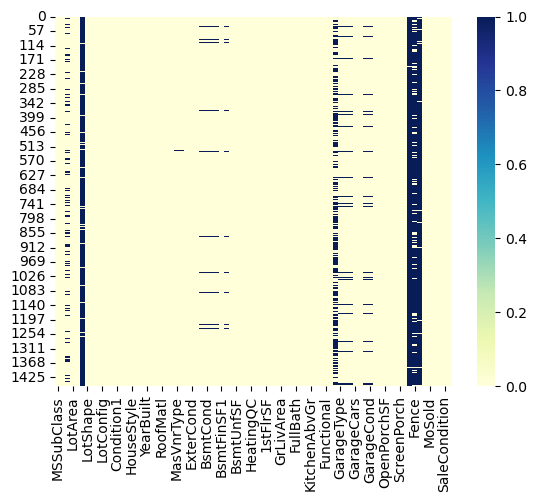

In [10]:
# Visualizing the missing values
# Creating a heatmap of missing values
sns.heatmap(dataset.isnull(), cmap="YlGnBu")
plt.show()

# Understanding Your Variables

In [11]:
# Dataset Columns
#checking features name of our column
dataset.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [12]:
# numeric columns
numeric_features = dataset.describe().columns
print(f"These are some of the numerical features:- {numeric_features}")

These are some of the numerical features:- Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [13]:
# categorical columns
categorical_features = dataset.describe(include=['object','category']).columns
print(f"These are some of the categorical features:- {categorical_features}")

These are some of the categorical features:- Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


**Unique Values for each variable**

In [14]:
# Check Unique Values for each variable.
numeric = dataset.select_dtypes(include=[np.number]).columns
for num_col in numeric:
    print(f"{num_col} : {dataset[num_col].nunique()} uniqueness variable(s)")

MSSubClass : 15 uniqueness variable(s)
LotFrontage : 110 uniqueness variable(s)
LotArea : 1073 uniqueness variable(s)
OverallQual : 10 uniqueness variable(s)
OverallCond : 9 uniqueness variable(s)
YearBuilt : 112 uniqueness variable(s)
YearRemodAdd : 61 uniqueness variable(s)
MasVnrArea : 327 uniqueness variable(s)
BsmtFinSF1 : 637 uniqueness variable(s)
BsmtFinSF2 : 144 uniqueness variable(s)
BsmtUnfSF : 780 uniqueness variable(s)
TotalBsmtSF : 721 uniqueness variable(s)
1stFlrSF : 753 uniqueness variable(s)
2ndFlrSF : 417 uniqueness variable(s)
LowQualFinSF : 24 uniqueness variable(s)
GrLivArea : 861 uniqueness variable(s)
BsmtFullBath : 4 uniqueness variable(s)
BsmtHalfBath : 3 uniqueness variable(s)
FullBath : 4 uniqueness variable(s)
HalfBath : 3 uniqueness variable(s)
BedroomAbvGr : 8 uniqueness variable(s)
KitchenAbvGr : 4 uniqueness variable(s)
TotRmsAbvGrd : 12 uniqueness variable(s)
Fireplaces : 4 uniqueness variable(s)
GarageYrBlt : 97 uniqueness variable(s)
GarageCars : 5 u

**Analyzing out target variable**

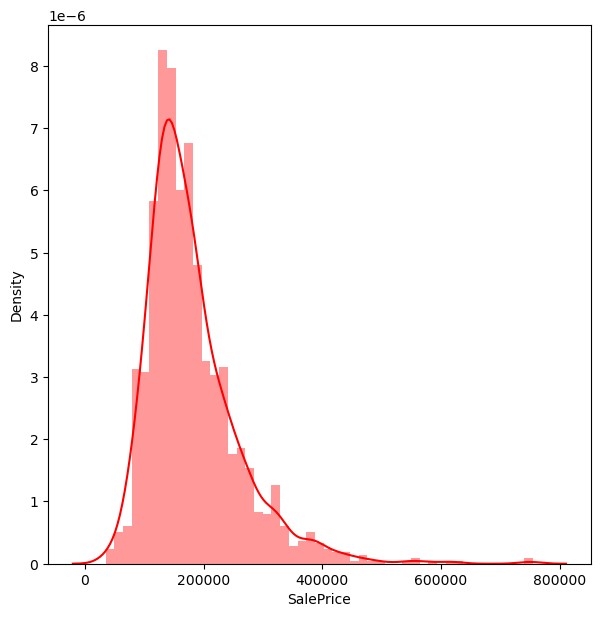

In [15]:
# Dependent variable 'SalePrice'
plt.figure(figsize=(7,7))
sns.distplot(dataset['SalePrice'],color="r")
plt.show()

Applying the log transformation so that we can see the change in the distribution and as it will now show somewhat normal distribution for our dependent variable 'SalePrice'.



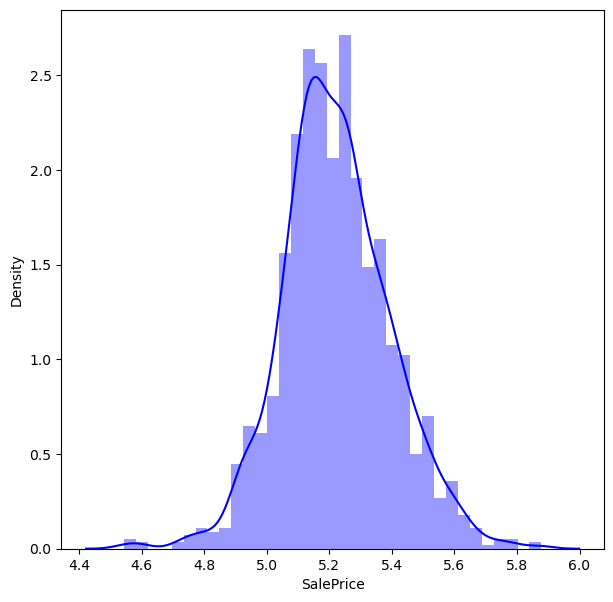

In [16]:
# Dependent variable 'SalePrice'
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset['SalePrice']),color="b")
plt.show()

Log transformation can help in making the distribution more symmetrical, which is desirable for certain statistical analyses that assume a normal distribution. 

**Checking the distribution for all the numerical independent variables**

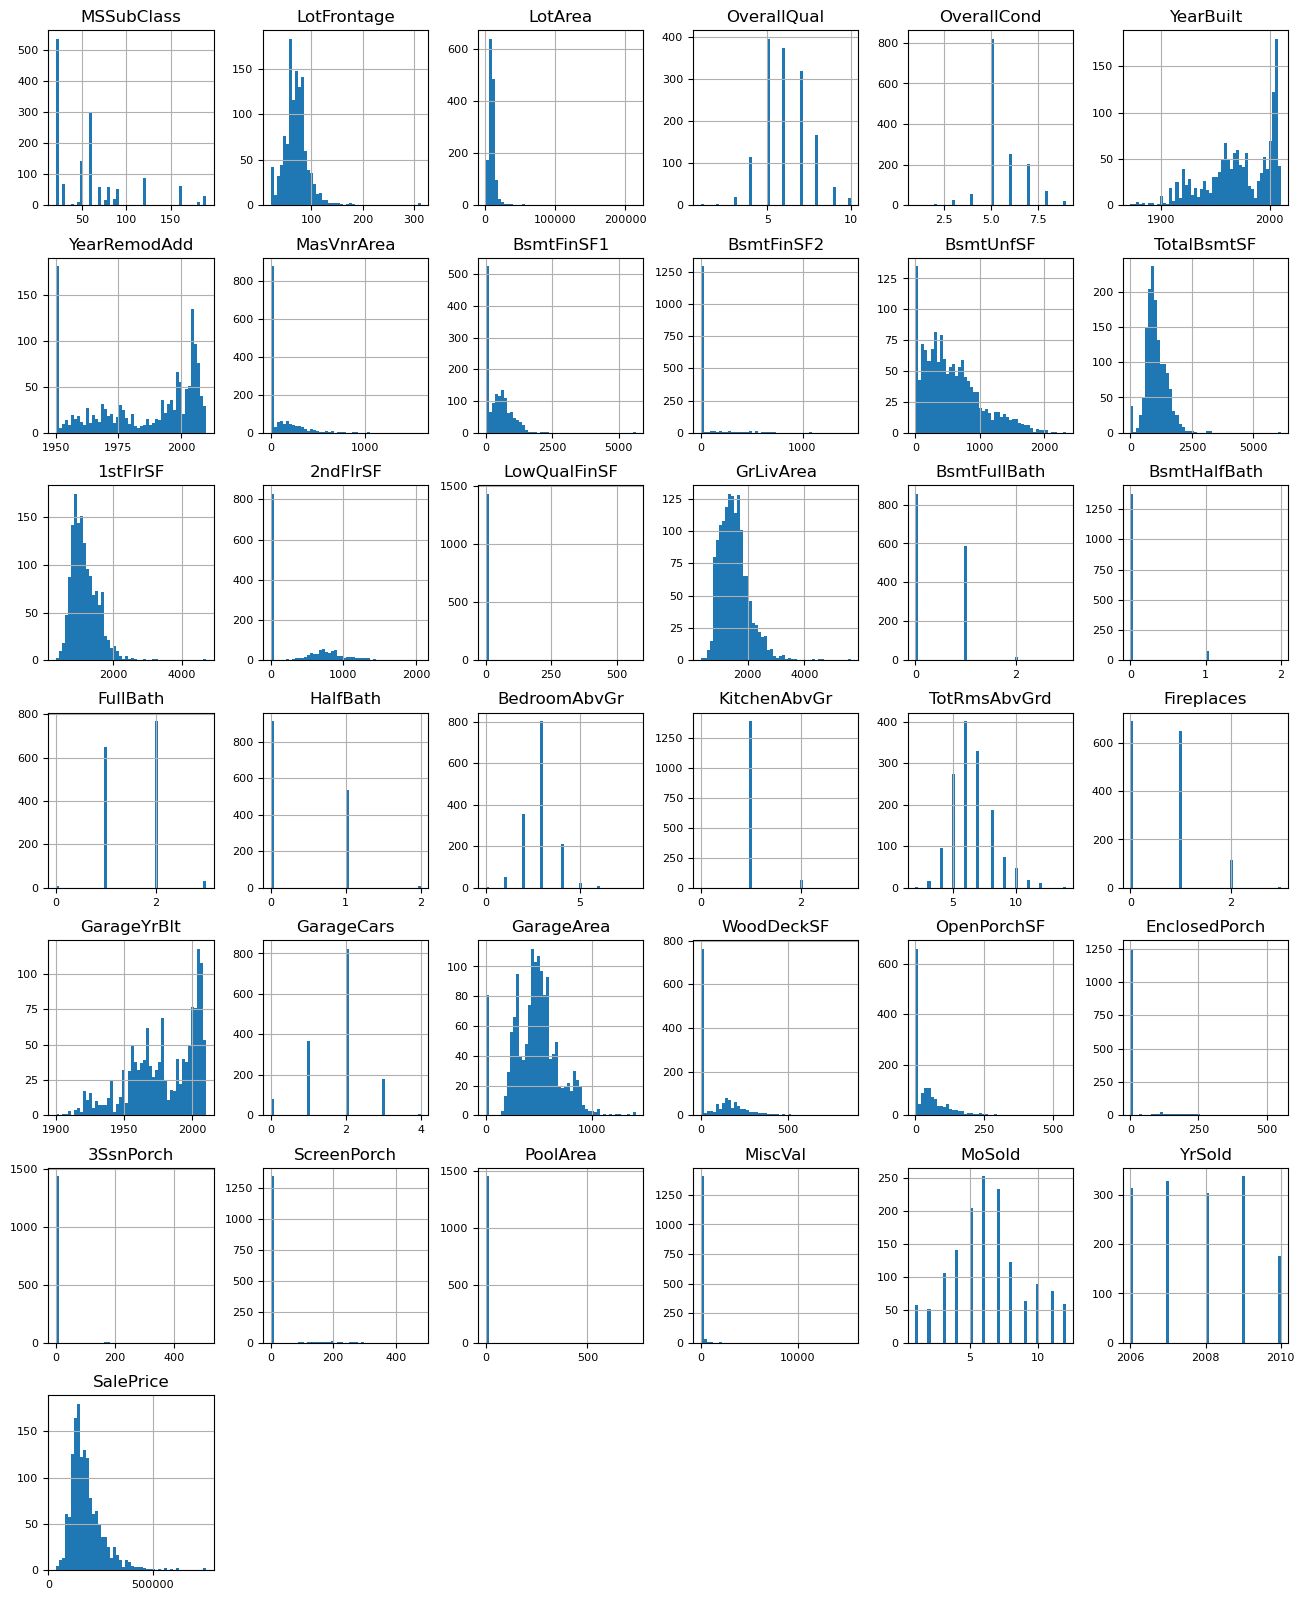

In [17]:
# Histogram for all numerical independent variables
dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Ploting a scatter plot of every variable with target variable

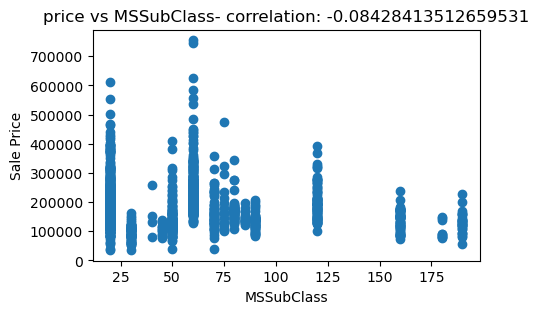

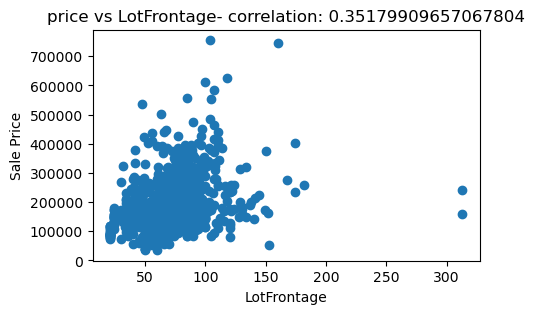

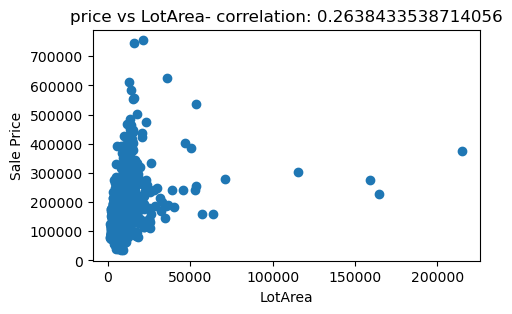

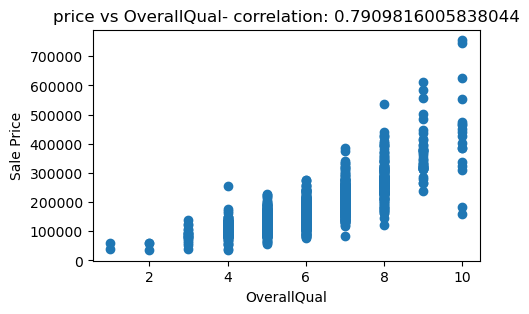

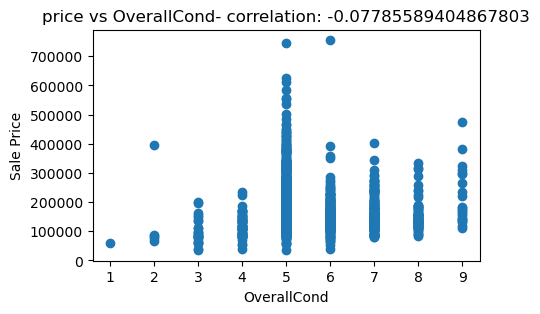

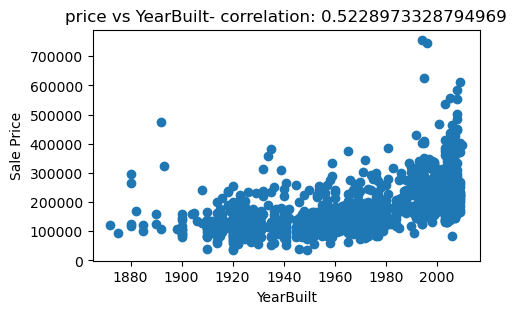

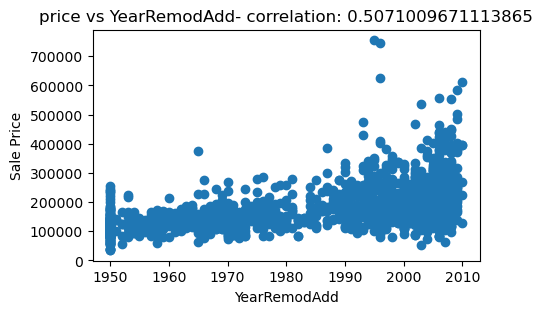

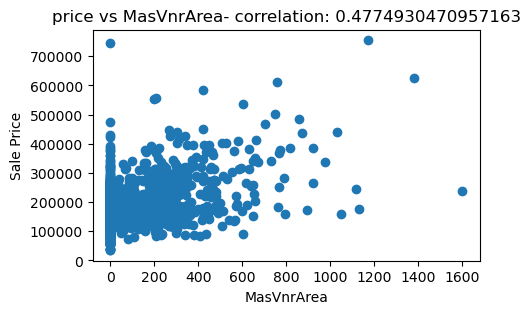

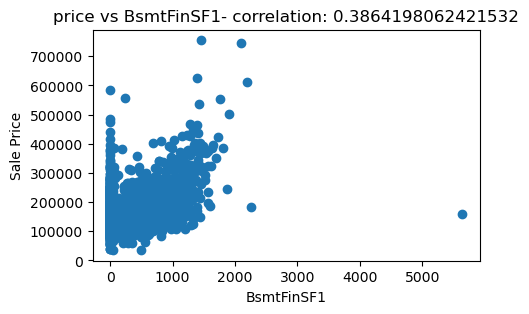

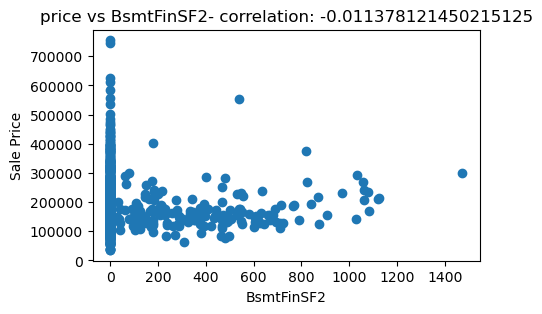

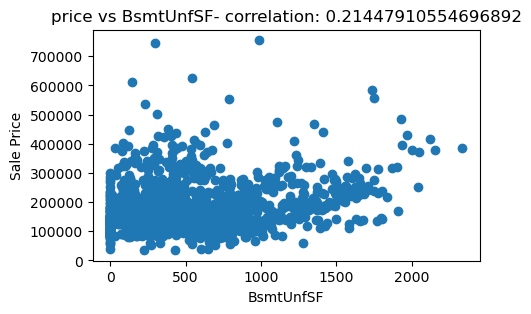

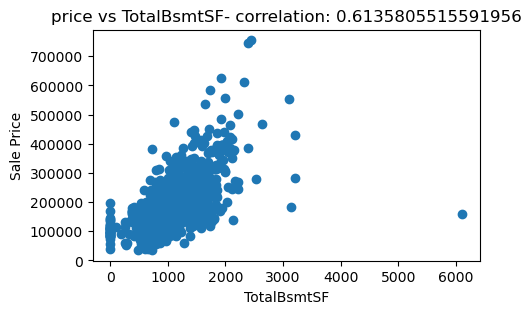

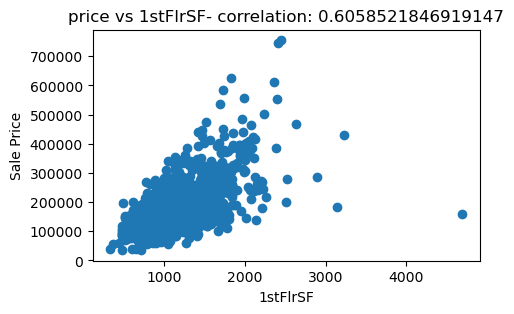

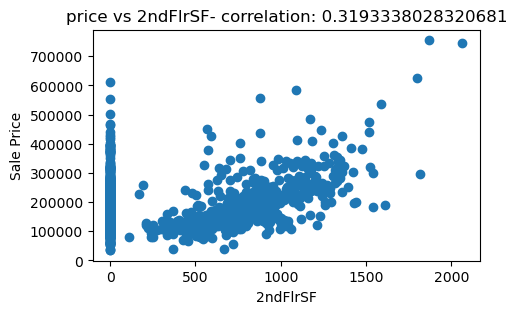

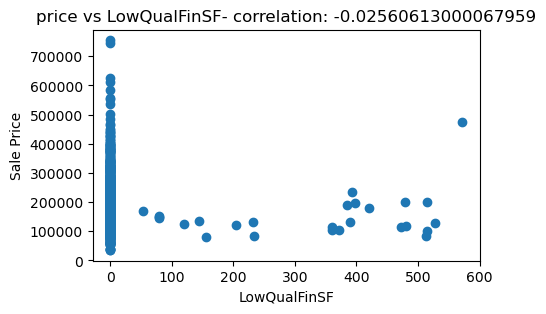

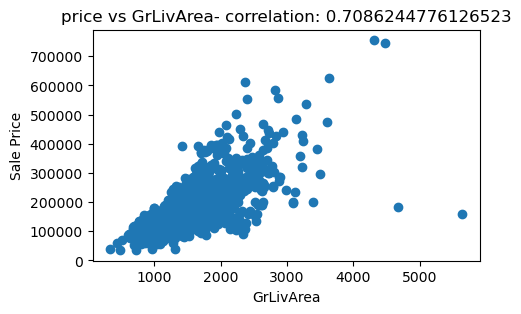

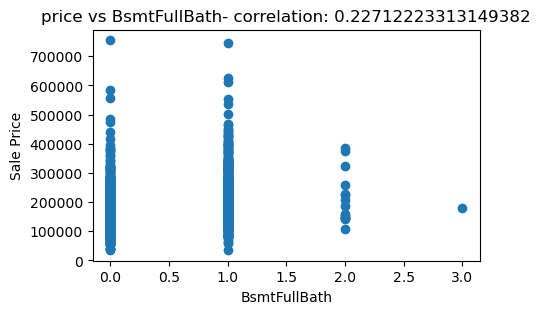

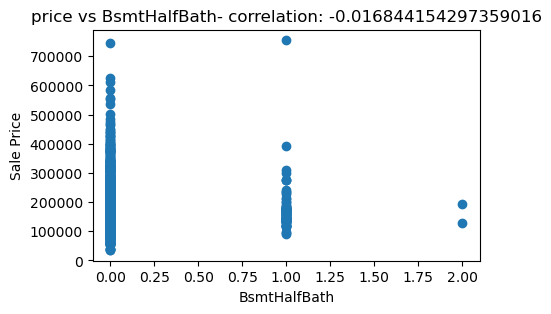

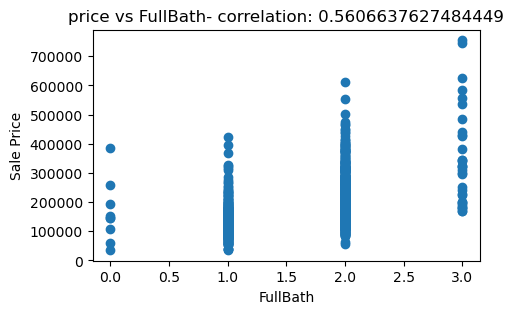

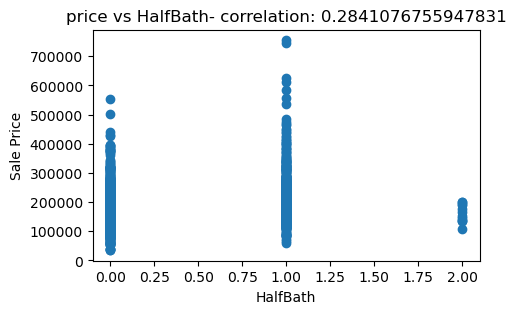

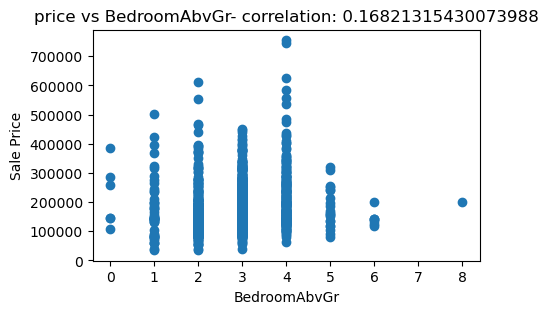

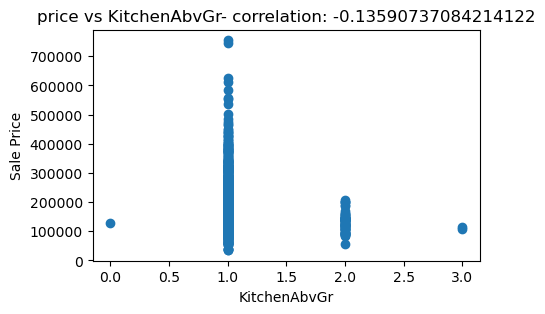

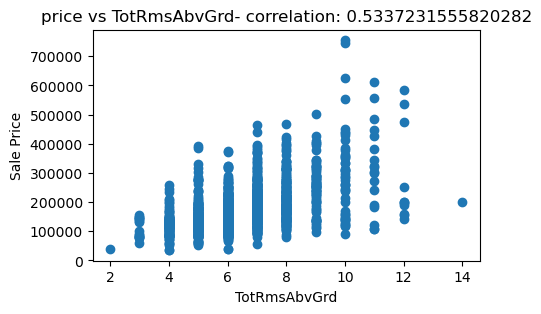

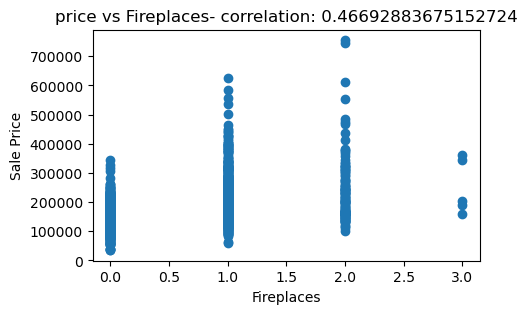

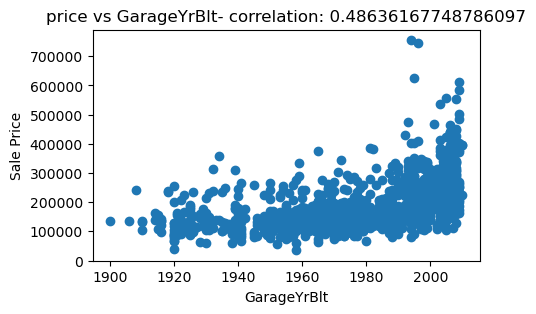

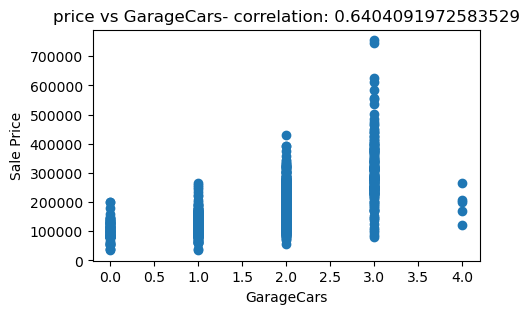

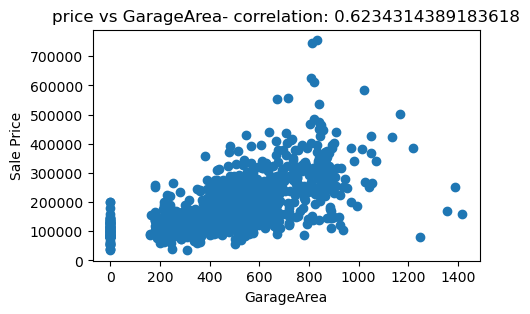

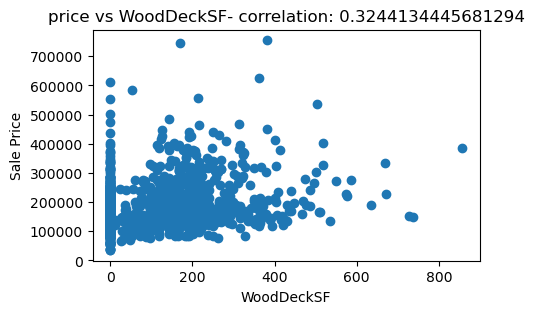

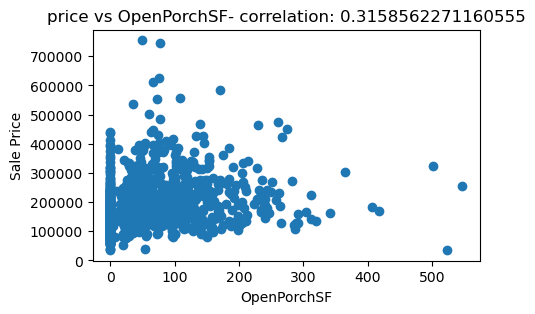

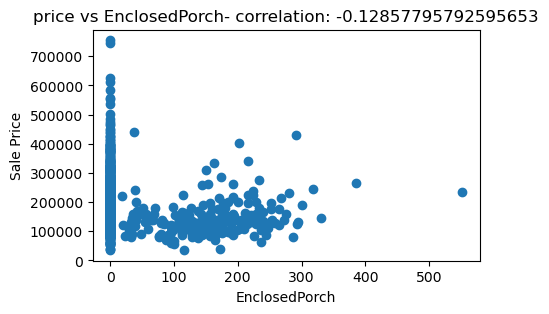

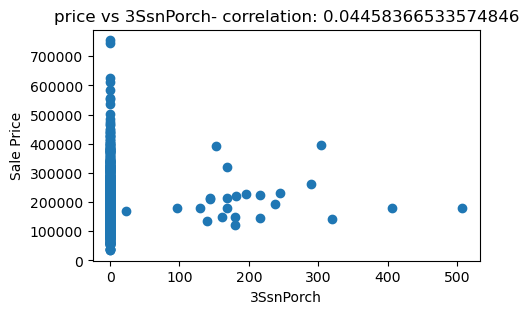

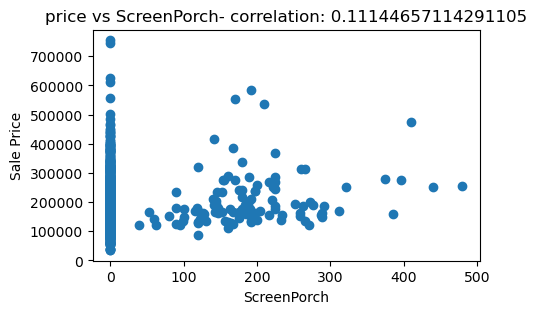

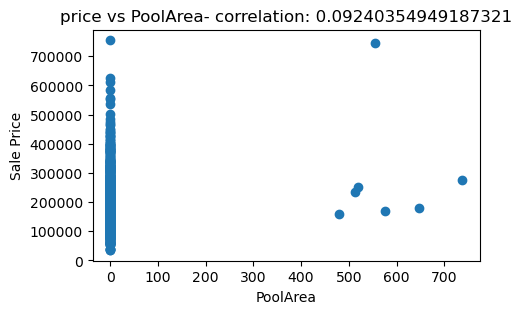

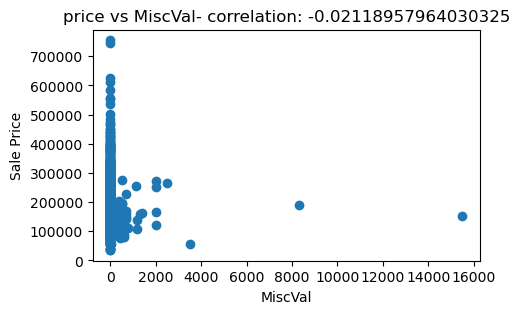

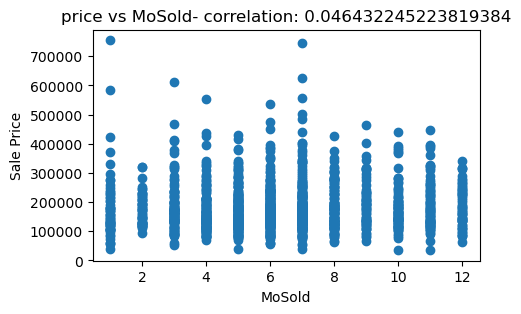

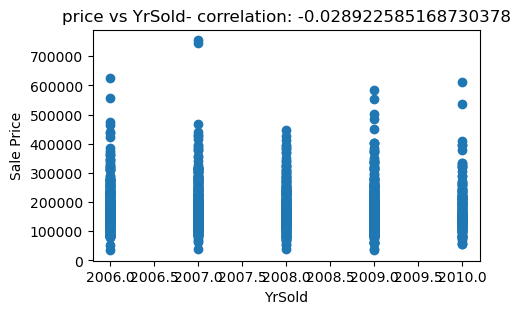

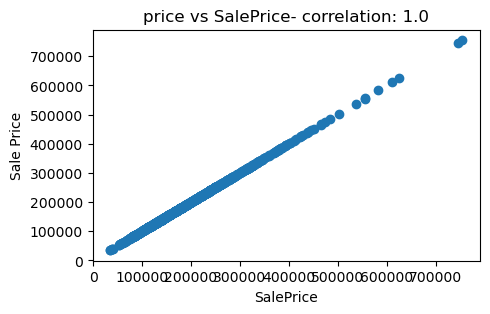

In [18]:
for col in numeric_features:
    fig = plt.figure(figsize=(5,3))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['SalePrice']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
  

plt.show()

<Axes: >

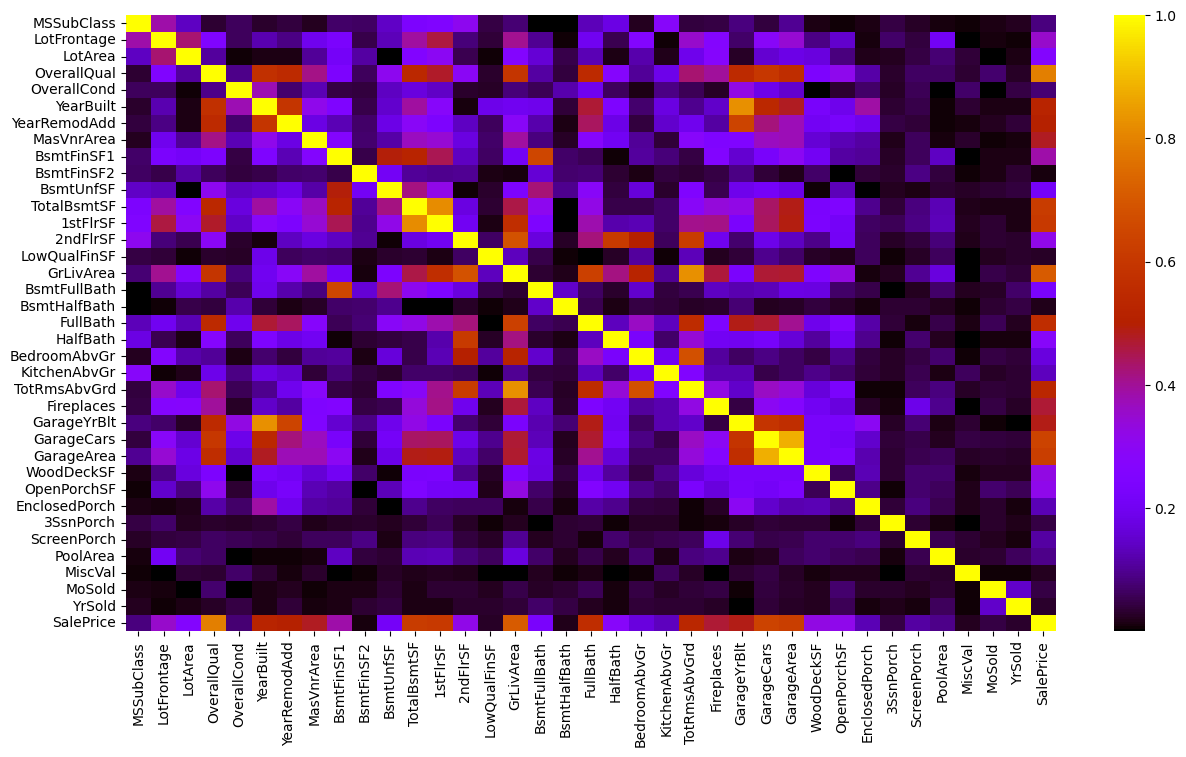

In [19]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), cmap='gnuplot')